<div dir=ltr align=center>In the name of God</div>
<br>
<font size=6><div dir=ltr align=center>
<font size=5>
Intelligent Analysis of
Biomedical Images
<br>
<font size=4>
sharif university of technology, CE department
</font>
<br>
<br>
<font size=6>
Homework 1.1
</font><br>
<font size=4>
Classic methods
</font>

**First-Name: Zahra**

**Last-Name: Soukhtedel**

**Student-Id: 98105138**

## Imoports and installs

In [ ]:
!pip install pydicom

In [ ]:
import numpy as np
from pydicom import dcmread
import matplotlib.pyplot as plt
import cv2

## load and work with DICOM (5)

complete the function `load_I` it should recive the file name and load the provided DICOM file, print its content and return the image in it.

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 212
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.8.1055.1.20111103112244831.30826609.78057758
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.1055.1
(0002, 0013) Implementation Version Name         SH: 'dicomlibrary-100'
(0002, 0016) Source Application Entity Title     AE: 'DICOMLIBRARY'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 182
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'SECONDARY', 'OTHER', 'ARC', 'DICOM', 'VALIDATION']
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.826.0.1.3680043.8.1055

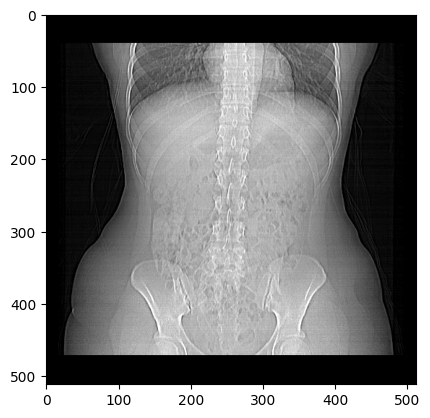

In [ ]:
def load_I(name):
  ds = dcmread(name)
  print(ds)
  return ds.pixel_array

I=load_I("img.dcm")
plt.imshow(I, cmap='gray')
plt.show()
naive_img = I

The cell below, adds some noise to the original image, don't change this code and run the cell.

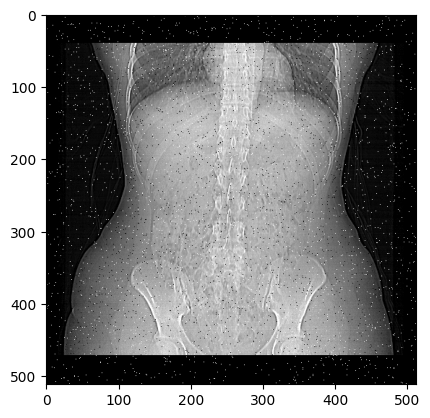

In [ ]:
def add_salt_and_pepper_noise(image, noise_ratio=0.02):
    noisy_image = image.copy()
    h, w= noisy_image.shape
    noisy_pixels = int(h * w * noise_ratio)

    for _ in range(noisy_pixels):
        row, col = np.random.randint(0, h), np.random.randint(0, w)
        if np.random.rand() < 0.5:
            noisy_image[row, col] = 0
        else:
            noisy_image[row, col] = 255

    return noisy_image

I=add_salt_and_pepper_noise(I)
plt.imshow(I, cmap="gray")
plt.show()

## Deniosing (25)

In last section we added some noise to the original image, now you are expected to denoise the noisy image using two diffrent approaches.
1. for the first method you should implement a frequency filter for denoising (low pass filter)
2. for the second method with respect to the nature of the noise we added, you are expected to choose a spatial filter that can reduce the noise. the result depends on the filter you choose and it is expexted that the spatial filter removes as much noise as possible.

you can visualize the denoised results at the end of this section to determine if your methods were succesfull.

then you should compare the results and choose the better denoised image.

### 1) denoising using frequency filters (15)
In this section you are expected to complete the function `low_pass`. function recieves niosy image `I`, converts it to frequncy domain using fourier transform, applys a low pass filter and converts it back to space domain and then returns the result (denoised image) `I_df`.

<ipython-input-39-37e76caec79c>:13: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(f))


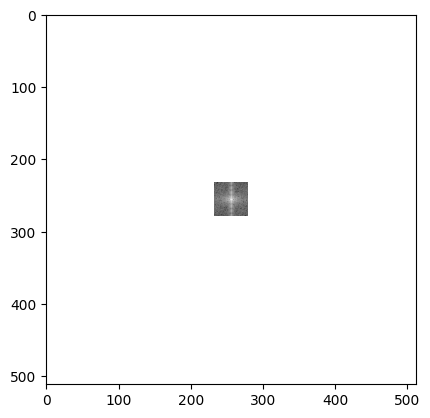

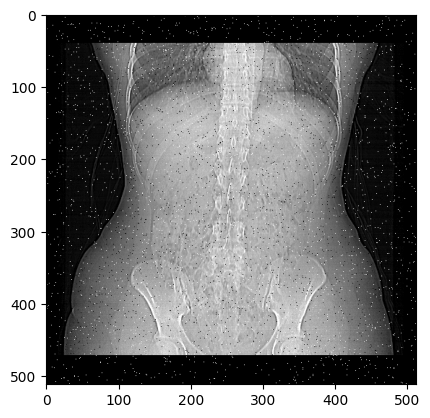

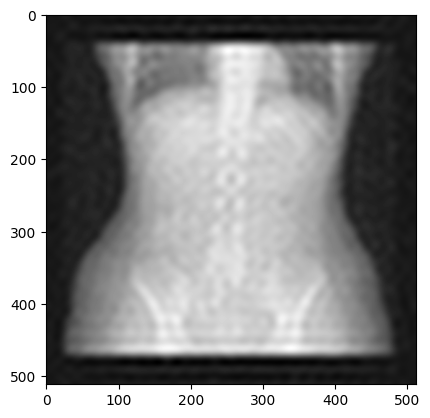

In [ ]:
def low_pass(I):

  f = np.fft.fft2(I)
  frac = 0.05
  r, c = f.shape
  mid_r, mid_c = np.int32(r/2), np.int32(c/2)
  f = np.fft.fftshift(f)

  cutted = np.copy(f)
  cutted[mid_r - int(r * frac): mid_r + int(r * frac), mid_c - int(c * frac): mid_c + int(c * frac)] = 0
  f = f - cutted

  magnitude_spectrum = 20*np.log(np.abs(f))
  plt.imshow(np.abs(magnitude_spectrum), cmap="gray")
  plt.show()

  img_back = np.real(np.fft.ifft2(np.fft.ifftshift(f)))

  return(img_back)

I_df=low_pass(I)

plt.imshow(I, cmap="gray")
plt.show()

plt.imshow(I_df, cmap="gray")
plt.show()

### 2) denoising using spatial filters (5)

In this section you are expected to complete the function `denoise_spatial`. function recieves niosy image `I`, applies a spatial filter on it to denoise it and returns the denoised image `I_ds`.

In [ ]:
from scipy import ndimage

def denoise_spatial(I):
  return ndimage.median_filter(I, 3)

I_ds=denoise_spatial(I)

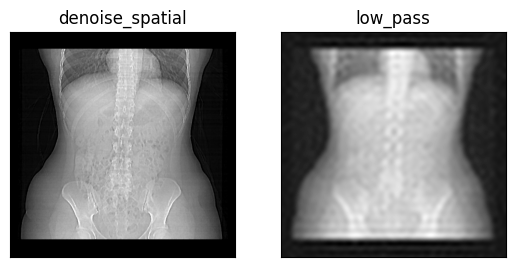

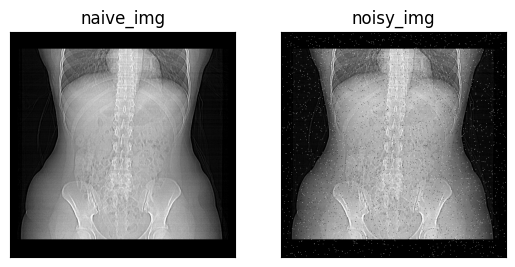

In [ ]:
plt.subplot(121),plt.imshow(I_ds, cmap = 'gray')
plt.title('denoise_spatial'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_df, cmap = 'gray')
plt.title('low_pass'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(naive_img, cmap = 'gray')
plt.title('naive_img'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I, cmap = 'gray')
plt.title('noisy_img'), plt.xticks([]), plt.yticks([])
plt.show()

### Question (5)

wich denoising method performed better? how is it related to the type and nature of the noise?

assign your chosen result of denoising to `I` for next section.

#### **Answer:**
The choice between frequency domain lowpass filters and spatial domain filters depends on the nature of the noise present in the image. If the noise is random and distributed across different frequencies, frequency domain lowpass filters are preferable. If the noise consists of impulsive or spatially localized artifacts, spatial domain filters would be more appropriate.
The selection of the denoising filter should be based on an understanding of the specific noise characteristics and the desired trade-off between noise reduction and preservation of image details. Spatial domain filters excel at preserving the edges and details of the image while effectively removing such noise.

**In our case**, since our noise consists of impulsive or spatially localized artifacts, spatial filters are more suitable for preserving the edges and details of the image while efficiently removing noises.


In [ ]:
I=I_ds

## Global Sharpening (15)

Denoising images usualy result in less detailed blury images, therfore it is desirable to sharpen the denoised image.
for this means we have to amplify image details by first extracting them and then adding them to the image.

in this section you are expected to sharpen the image as described, once by using high pass filter and once by a spatial filter that can extract details (like edge detection filters).

### 1) sharpening using high pass filter (10)
complete the function `high_pass`.it recives image `I` converts it to frequncy domain using fourier transform, applies a high pass filter and converts it back to space domain and then returns the result (details of the image) `detail_I`.

hint: you can use the low pass filter you implemented earlier.

<ipython-input-43-3d8dd288e9c9>:10: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 22*np.log(np.abs(f))


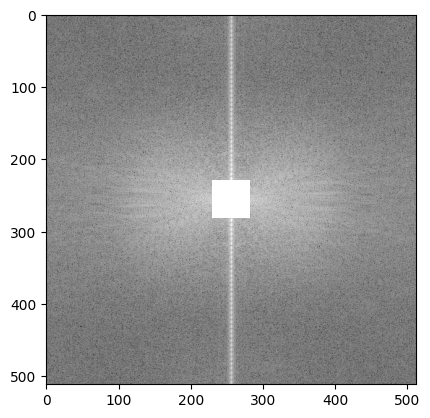

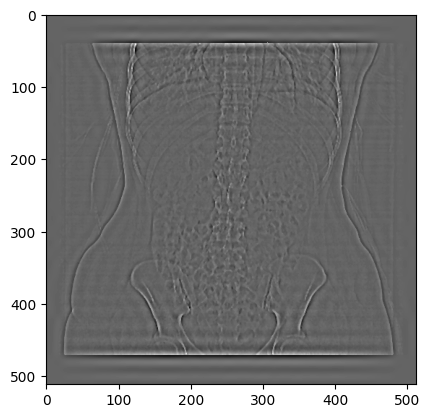

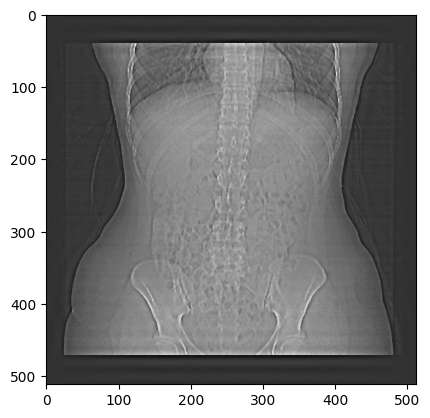

In [ ]:
def high_pass(I):
  f = np.fft.fft2(I)
  frac = 0.05
  r, c = f.shape
  mid_r, mid_c = np.int32(r/2), np.int32(c/2)
  f = np.fft.fftshift(f)

  f[mid_r - int(r * frac): mid_r + int(r * frac), mid_c - int(c * frac): mid_c + int(c * frac)] = 0

  magnitude_spectrum = 22*np.log(np.abs(f))
  plt.imshow(np.real(magnitude_spectrum), cmap="gray")
  plt.show()

  img_back = np.real(np.fft.ifft2(np.fft.ifftshift(f)))

  return(img_back)

detail_I = high_pass(I)آها
I_sharp_hi=I+detail_I
plt.imshow(detail_I, cmap= 'gray')
plt.show()
plt.imshow(I_sharp_hi, cmap= 'gray')
plt.show()


### 2) sharpening using a spatial filter (5)
complete the function `detail_spatial`.it recives image `I` applies a spatial filter on it that can extract image details and returns the result (details of the image) `detail_I`.

hint: search for edge detection spatial filters.

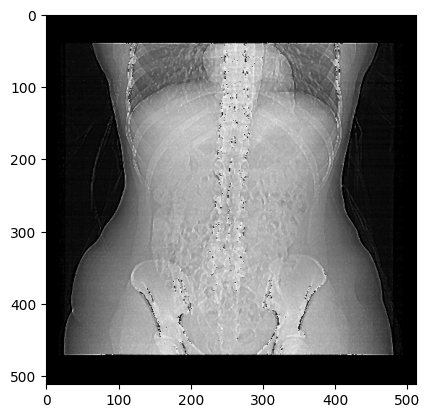

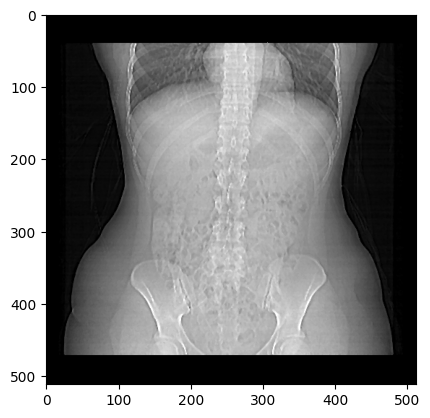

In [ ]:
def detail_spatial(I):
  kernel = np.array([[0, -1, 0],
                   [-1, 4.001 ,-1],
                   [0, -1, 0]])
  return cv2.filter2D(src=I, ddepth=-1, kernel=kernel)


detail_I = detail_spatial(I)
I_sharp_spatial=I+detail_I
plt.imshow(I_sharp_spatial, cmap= "gray")
plt.show()
plt.imshow(I, cmap= "gray")
plt.show()

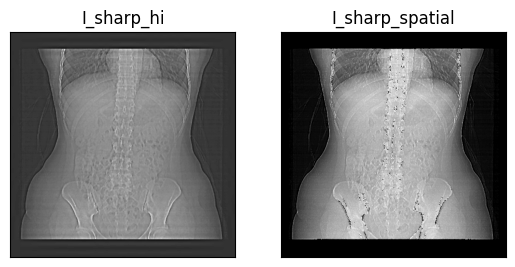

In [ ]:
plt.subplot(121),plt.imshow(I_sharp_hi, cmap = 'gray')
plt.title('I_sharp_hi'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_sharp_spatial, cmap = 'gray')
plt.title('I_sharp_spatial'), plt.xticks([]), plt.yticks([])
plt.show()

## Multi-scale image enhancement (40)

In this section you are expected to implement multi-scale image enhancement. You should build pyramid of detail with your preferd enhancment method (you can use the high pass filter you implemented) and add it to the original image level by level.

complete the function `multi_enhance`. it recives the image `I` performs the explained enhancment and returns the result.

you can write other functions as needed to be called in the `multi_enhance` function.

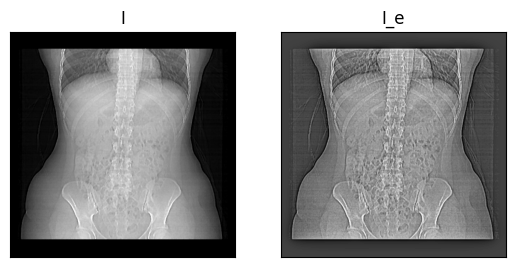

In [ ]:
def up_sample_blur(I1):
    return cv2.pyrUp(I1)

def down_sample(I2):
    return cv2.pyrDown(I2)

def image_pyramid(I1, n_levels):
    lst = list()
    I1 = np.float32(I1)

    for i in range(0, n_levels):
        I_d = down_sample(I1)
        D = I1 - up_sample_blur(I_d)
        lst.append(D)
        I1 = I_d

    lst.append(I1)
    return(lst)

def image_pyramid_rec(lst, n_levels):

    I1 = lst[n_levels]

    for i in range(n_levels, 0, -1):
      I1 = up_sample_blur(I1) + lst[i-1]

    return(I1)


def global_enhancement(I):
    return(np.tanh(I/16) * max(np.max(I), np.abs(np.min(I))))

def multi_enhance(I1):
  num = 4
  prm = image_pyramid(I1, num)
  I1 = prm[num]

  for i in range(num):
    prm[i] = global_enhancement(prm[i])

  I_e = image_pyramid_rec(prm, num)
  return I_e

I_e=multi_enhance(I)

plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('I'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_e, cmap = 'gray')
plt.title('I_e'), plt.xticks([]), plt.yticks([])
plt.show()

I=I_e

## Gray level enhancment (15)

using gray level enhancment try to enhance the contrast of last sections result.
you have to complete the function `gray_enhance` it recives an image `I` and returns the enhanced image `I_c`

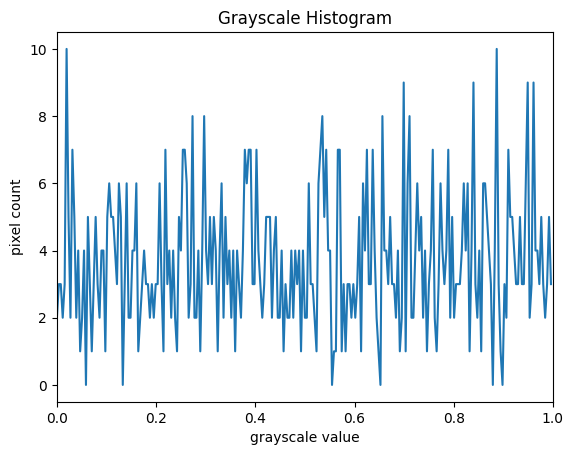

In [ ]:
histogram, bin_edges = np.histogram(I, bins=256, range=(0, 1))
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)

<ipython-input-95-eac35f280535>:6: RuntimeWarning: invalid value encountered in log
  log_image =  c * (np.log(image + 1))
<ipython-input-95-eac35f280535>:11: RuntimeWarning: invalid value encountered in power
  r2 = np.power(I,gamma)


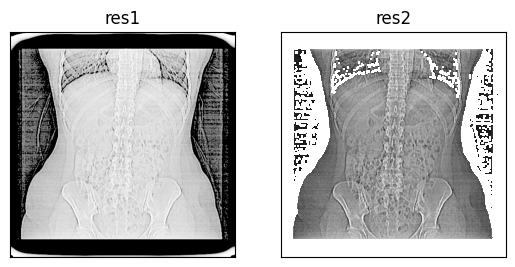

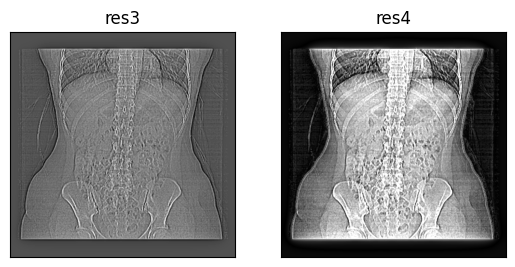

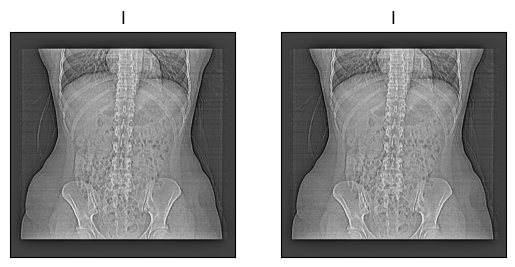

In [ ]:
def gray_enhance(I):
  image = I.copy()

  # logarithmic transformation
  c=255 / np.log(1 + np.max(image))
  log_image =  c * (np.log(image + 1))
  r1 = np.array(log_image, dtype = np.uint8)

  # power law transformation
  gamma = 0.65
  r2 = np.power(I,gamma)

  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
  # Top Hat Transform
  topHat = cv2.morphologyEx(I, cv2.MORPH_TOPHAT, kernel)
  # Black Hat Transform
  blackHat = cv2.morphologyEx(I, cv2.MORPH_BLACKHAT, kernel)
  r3 = I + topHat - blackHat

  alpha = 1.007
  # control brightness by 50
  beta = 10
  r4 = cv2.convertScaleAbs(I, alpha=alpha, beta=beta)

  # Equalize the histogram
  r5 = I

  return r1, r2 , r3, r4, r5

r1, r2, r3, r4, r5 =gray_enhance(I)
plt.subplot(121),plt.imshow(r1, cmap = 'gray')
plt.title('res1'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(r2, cmap = 'gray')
plt.title('res2'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(r3, cmap = 'gray')
plt.title('res3'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(r4, cmap = 'gray')
plt.title('res4'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(121),plt.imshow(r5, cmap = 'gray')
plt.title('I'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I, cmap = 'gray')
plt.title('I'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
I_c = r4

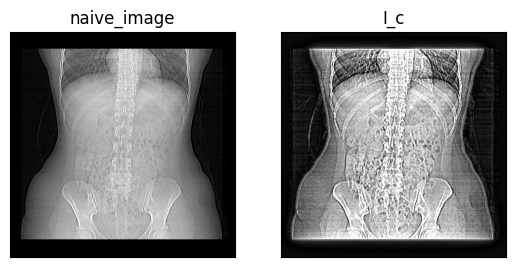

In [ ]:
plt.subplot(121),plt.imshow(naive_img, cmap = 'gray')
plt.title('naive_image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_c, cmap = 'gray')
plt.title('I_c'), plt.xticks([]), plt.yticks([])
plt.show()